In [1]:
import numpy as np
import pandas as pd
import spacy
import nltk
from nltk.stem import WordNetLemmatizer
import os
import string
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import words
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import gensim.downloader as api
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [2]:
# will be used to analyse all three dataframes 
word_vectors = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [50]:
blogdf = pd.read_csv('/content/drive/MyDrive/text_mining_project/naturalscience/additionalblogs.csv')
# to carve out a data frame which contains only blog posts pertaining discusions about physics
physics_df = blogdf[blogdf['Topic'] == 'Physics'].dropna(how="any")
# to carve out a data frame which contains only blog posts pertaining discusions about chemistry 
chemistry_df = blogdf[blogdf['Topic'] == 'Chemistry'].dropna(how="any")

# to carve out a data frame which contains only blog posts pertaining discusions about biology
biology_df = blogdf[blogdf['Topic'] == 'Biology'].dropna(how="any")

In [46]:
class Word_Clusters:
  def __init__(self, inputdf): 
    self.inputdf = inputdf 
    self.nouns = [ ]
    self.verbs = [ ]
    self.adj = [ ] 
    self.adv = [ ] 

  def stortextdata(self): 
    """
    input: the input data frame 

    output: four instance lists 
    a list over all nouns 
    a list over all verbs 
    a list over all adjectives 
    a list over all adverbs 
    """

    nlp = spacy.load("en_core_web_sm") 
    for text in self.inputdf['cleaned_Comments'].tolist(): 
      doc = nlp(text) 
      for token in doc: 
        if token.pos_ == 'NOUN': 
          self.nouns.append(str(token.lemma_ )) 
        if token.pos_ == 'VERB':
          self.verbs.append(str(token.lemma_ ))
        if token.pos_ == 'ADJ':
          self.adj.append(str(token.lemma_ ))
        if token.pos_ == 'ADV': 
          self.adv.append(str(token.lemma_ ))

  def clusteranalysis(self, group, word_weights, threshold, nrcluster): 
    if group == 'nouns': 
      current_list = self.nouns
    if group == 'verbs': 
      current_list = self.verbs
    if group == 'adjectives': 
      current_list = self.adj
    if group == 'adverbs': 
      current_list = self.adv  


    # to store all words in a hash table 
    word_dict = {}

    # to store all unique words in a list 
    unique_list = [ ]
    
    for word in current_list: 
      if word not in word_dict: 
        word_dict[word] = 1
      else: 
        word_dict[word] += 1
      if word not in unique_list:
        unique_list.append(word) 
    wordnotstored = ['covid', 'plasmogamy', 'subreddit', 'naocl', 'orgo', 'dumbass', 'limescale', 'miniboone', 'nsfw', 'sqrt', 
                     'excipient', 'measle', 'herpe',  'viltrumite',  'nociceptor', 'surinamicum', 'downvote', 'listicle', 
                     'superconducte', 'duckle','lavoisi', 'backlink', 'haro', 'astrophysic', 'polariton', 'shart', 'serp', 
                     'molarity', 'nilered', 'hocl', 'idk', 'nhttps',  'chemdraw', 'ochem', 'dcpip', 'mgso4','ethanoate', 'percepta',
                     'savevideo', 'exotherm', 'redditor', 'organometallics','thiophenol', 'cac2', 'bicarb', 'clotrimazole','agcl', 
                     'dibromobenzene', 'solubles', 'subreddits', 'h3po4','denatonium', 'fomitopsis', 'agno3', 'polyglycerol', 'karyogamy', 
                     'hossenfelder','tauon','10ls', 'vixra' ,  'veritasium', 'lsnd', 'microboone',  'popsci', 'leptogenesis', 'wlsf', 
                      'optout', 'syngamy', 'plasmolysis', 'ibotenic', 'shroom', 'fakespot', 'pectinatus', ]
                      
    clusterwords = [ ]
    wordvetor= [ ]
    for key, value in word_dict.items(): 
      if value > threshold: 
        if key not in wordnotstored:
            clusterwords.append(key)
            wordvetor.append(word_weights[key])
    wordvectornp = np.array(wordvetor)
    tsne = TSNE(n_components=2, random_state= 3, n_iter=10000, perplexity=4)
    np.set_printoptions(suppress=True)
    word_transformation = tsne.fit_transform(wordvectornp)
    kmeans = KMeans(n_clusters=nrcluster) 
    kmeans.fit(word_transformation) 
    Kmeanclusters = kmeans.predict(word_transformation)
    self.clusterwords = clusterwords
    labels = clusterwords 
    plt.figure(figsize=(20, 20))
    plt.scatter(word_transformation[:, 0], word_transformation[:, 1], c= Kmeanclusters, edgecolors='white', s = 150)
      
    for label, x, y in zip(labels, word_transformation[:, 0], word_transformation[:, 1]):
      plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', fontsize=12)
    
    clusterdict = { } 
    for i in range(len(Kmeanclusters)): 
      label = Kmeanclusters[i] 
      word = clusterwords[i] 
      if label not in clusterdict: 
        wordlist = [word]
        clusterdict[label] = wordlist
      else: 
        clusterdict[label].append(word) 

    return clusterdict, unique_list



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


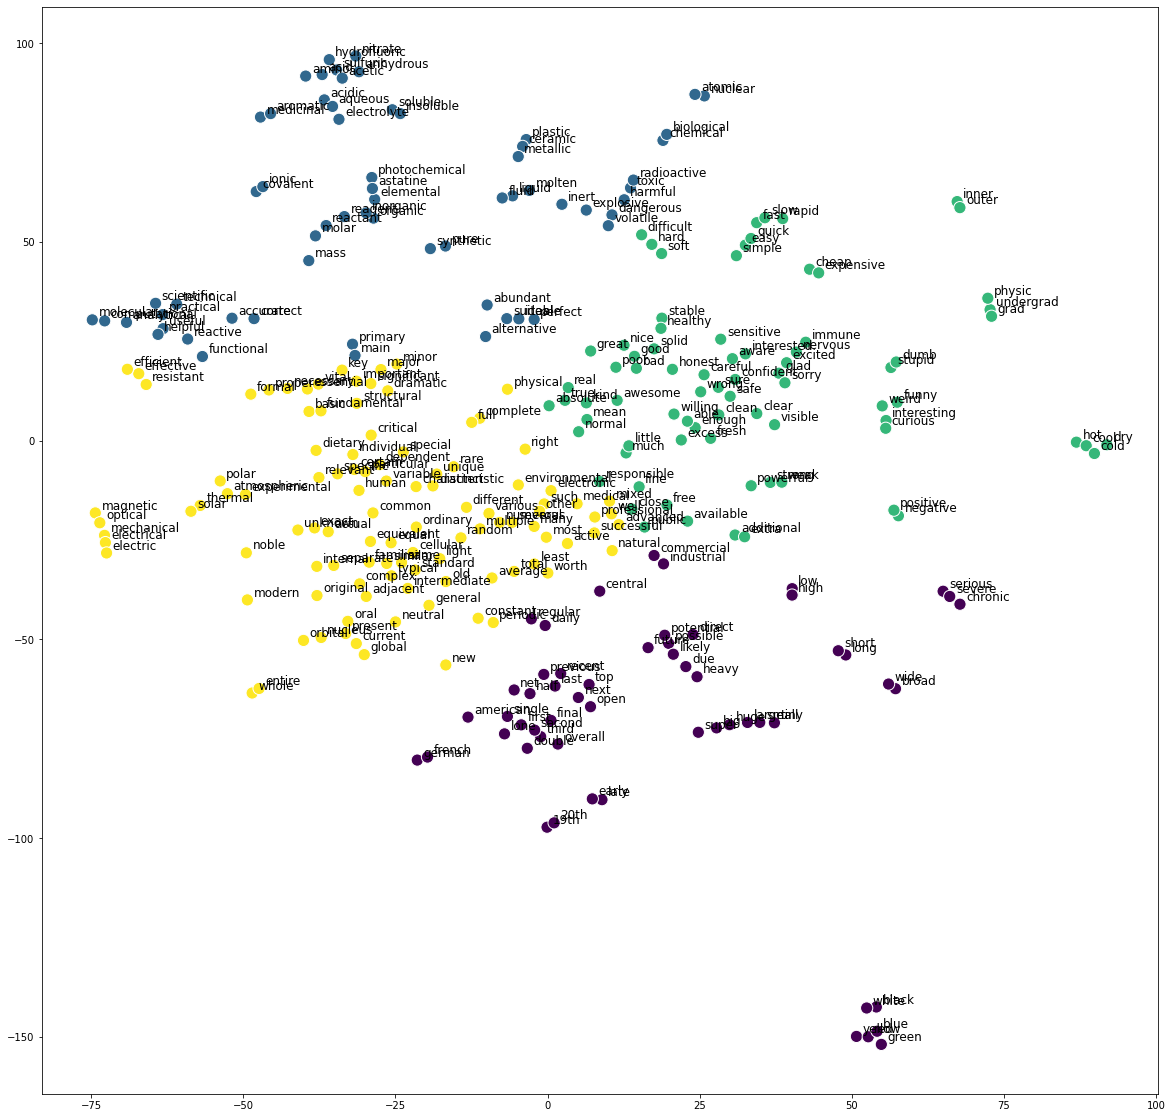

In [47]:
model1 = Word_Clusters(chemistry_df)

model1.stortextdata()

clusterdict, unique_list = model1.clusteranalysis('adjectives', word_vectors, threshold= 10, nrcluster = 4) 

In [ ]:
class Word_Clusters:
  def __init__(self, inputdf): 
    self.inputdf = inputdf 
    self.nouns = [ ]
    self.verbs = [ ]
    self.adj = [ ] 
    self.adv = [ ] 

  def stortextdata(self): 
    """
    input: the input data frame 

    output: four instance lists 
    a list over all nouns 
    a list over all verbs 
    a list over all adjectives 
    a list over all adverbs 
    """

    nlp = spacy.load("en_core_web_sm") 
    for text in self.inputdf['cleaned_Comments'].tolist(): 
      doc = nlp(text) 
      for token in doc: 
        if token.pos_ == 'NOUN': 
          self.nouns.append(str(token)) 
        if token.pos_ == 'VERB':
          self.verbs.append(str(token))
        if token.pos_ == 'ADJ':
          self.adj.append(str(token))
        if token.pos_ == 'ADV': 
          self.adv.append(str(token))

  def clusteranalysis(self, group, word_weights, threshold): 
    if group == 'nouns': 
      current_list = self.nouns
    if group == 'verbs': 
      current_list = self.verbs
    if group == 'adjectives': 
      current_list = self.adj
    if group == 'adverbs': 
      current_list = self.adv  


    # to store all words in a hash table 
    word_dict = {}

    # to store all unique words in a list 
    unique_list = [ ]
    
    for word in current_list: 
      if word not in word_dict: 
        word_dict[word] = 1
      else: 
        word_dict[word] += 1
      if word not in unique_list:
        unique_list.append(word) 
    wordnotstored = ['covid', 'plasmogamy', 'subreddit', 'naocl', 'orgo', 'dumbass', 'limescale', 'miniboone', 'nsfw', 'sqrt', 
                     'molarity', 'nilered', 'hocl', 'idk', 'nhttps',  'chemdraw', 'ochem', 'dcpip', 'mgso4','ethanoate', 'percepta',
                     'savevideo', 'exotherm', 'redditor', 'organometallics','thiophenol', 'cac2', 'bicarb', 'clotrimazole','agcl', 
                     'dibromobenzene', 'h3po4','denatonium', 'agno3', 'polyglycerol', ]
                      
    clusterwords = [ ]
    wordvetor= [ ]
    for key, value in word_dict.items(): 
      if value > threshold: 
        if key not in wordnotstored:
            clusterwords.append(key)
            wordvetor.append(word_weights[key])
    wordvectornp = np.array(wordvetor)
    tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
    np.set_printoptions(suppress=True)
    word_transformation = tsne.fit_transform(wordvectornp)

    self.transformingwords = word_transformation

    # to create a new instance variable 
    self.allwords = wordvetor

    # to use elbow methods to optimise the number of clusters 
    # to create an empty vector 
    optimisation_result = []

    antal_clusters = range(1, 20) 
    # to optimise the number of clusters
    for nr in antal_clusters: 
      kmeanModel = KMeans(n_clusters=nr) 
      kmeanModel.fit(word_transformation) 
      optimisation_result.append(kmeanModel.inertia_) 

    plt.figure(figsize=(10, 10)) 

    plt.plot(antal_clusters, optimisation_result, 'bx-', color = 'orangered', linewidth=4) 
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal number of clusters')
    plt.grid() 

  def klusterwords(self, nr_clusters): 
    """

    """

    kmeanModel = KMeans(n_clusters = nr_clusters)  
    kmeanModel.fit(self.transformingwords) 
    Kmeanclusters = kmeanModel.predict(self.transformingwords)  

    labels = self.allwords 

    plt.figure(figsize=(20, 20))
    plt.scatter(self.transformingwords[:, 0], self.transformingwords[:, 1], c= Kmeanclusters, edgecolors='white', s = 150)
      
    for label, x, y in zip(labels, self.transformingwords[:, 0], self.transformingwords[:, 1]):
      plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', fontsize=12)
    
    clusterdict = { } 
    for i in range(len(Kmeanclusters)): 
      label = Kmeanclusters[i] 
      word = self.allwords[i]  
      if label not in clusterdict: 
        wordlist = [word]
        clusterdict[label] = wordlist
      else: 
        clusterdict[label].append(word) 

    return clusterdict 


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


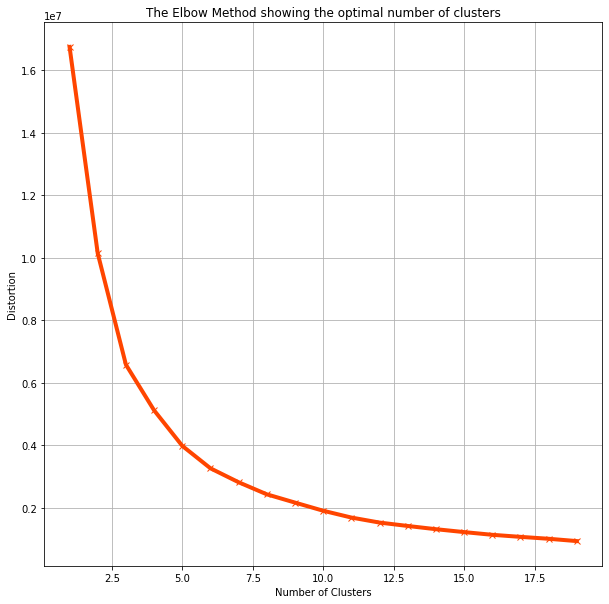

In [ ]:
model1 = Word_Clusters(chemistry_df)

model1.stortextdata()

model1.clusteranalysis('nouns', word_vectors, threshold=2) 
